# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Output Log File (CSV)
log_file = "output_data/log.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

895

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Create a log data for each city as it's being processed (with the city number and city name).


In [3]:
# Save config information.
# Set the base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Set the units format to get temperature in Fahrenheit
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Create columns for cities Data Frame
column_names = ["City", "Country", "Date", "Lat", "Lng", "Cloudiness", "Humidity", "Max Temp", "Wind Speed"]
# Create Data Frame for cities data
cities_data_df = pd.DataFrame(columns = column_names)
# Create Data Frame for log information
log_df = pd.DataFrame(columns=["Log record"])

# Get data for each city in the list of cities
for index,city in enumerate(cities):
    # Get weather data
    response = requests.get(query_url + city).json()
    
    # Set index for cities data frame
    i=len(cities_data_df["City"])
    
    # Since some data may be missing have use a try-except to skip any that are missing a data point.
    try:
        log_df.loc[i, "Log record"] = f"Processing Record {index+1} | {city}"
 #       print(f"Processing Record {index+1} | {city}")

        cities_data_df.loc[i, "City"] = response["name"]
        cities_data_df.loc[i, "Country"] = response["sys"]["country"]
        cities_data_df.loc[i, "Date"] = response["dt"]
        cities_data_df.loc[i, "Lat"] = response["coord"]["lat"]
        cities_data_df.loc[i, "Lng"] = response["coord"]["lon"]
        cities_data_df.loc[i, "Cloudiness"] = response["clouds"]["all"]
        cities_data_df.loc[i, "Humidity"] = response["main"]["humidity"]
        cities_data_df.loc[i, "Max Temp"] = response["main"]["temp_max"]
        cities_data_df.loc[i, "Wind Speed"] = response["wind"]["speed"]
        
    except (KeyError, IndexError):
        log_df.loc[i, "Log record"] = f"City {city} not found. Skipping..."
#        print(f"City {city} not found. Skipping...")

print("End of API calls")

End of API calls


In [5]:
log_df.count()

Log record    812
dtype: int64

In [6]:
log_df.head()

,Log record
0,Processing Record 1 | coahuayana
1,Processing Record 2 | esna
2,Processing Record 3 | cape town
3,Processing Record 4 | dikson
4,Processing Record 5 | bilma


### Display the cities DataFrame 
* Export the city data into a csv-file.
* Export the log data into a csv-file.
* Display the cities DataFrame

In [7]:
#  Output cities data in the csv-file
cities_data_df.to_csv(output_data_file, index=False, header=True)

#  Output log-data in the csv-file
log_df.to_csv(log_file, index=False, header=True)

In [10]:
cities_data_df.count()

City          811
Country       811
Date          811
Lat           811
Lng           811
Cloudiness    811
Humidity      811
Max Temp      811
Wind Speed    811
dtype: int64

In [11]:
# Display the cities DataFrame
cities_data_df.head()

,City,Country,Date,Lat,Lng,Cloudiness,Humidity,Max Temp,Wind Speed
0,Coahuayana,MX,1562173173,18.62,-100.35,100,64,86.3,1.41
1,Esna,RO,1562173173,45.2,27.57,90,64,71.6,16.11
2,Cape Town,ZA,1562172986,-33.93,18.42,75,77,60.8,5.82
3,Dikson,RU,1562173173,73.51,80.55,100,86,37.16,10.38
4,Bilma,NE,1562173173,18.69,12.92,45,21,97.82,5.32


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

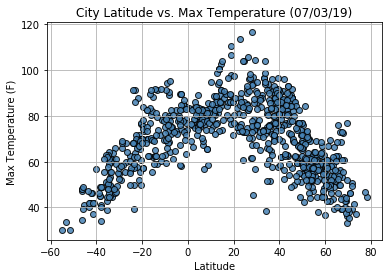

In [15]:
# Get Max Temperature
temp_max=cities_data_df["Max Temp"].max()
# Get max date with Max Temperature
date_utc = cities_data_df["Date"].loc[cities_data_df["Max Temp"] == temp_max].max()
# Convert max date with Max Temperature from Unix,UTC to readable format
date = datetime.fromtimestamp(date_utc).strftime("%m/%d/%y")

# Build a scatter plot for each data type
plt.scatter(cities_data_df["Lat"], cities_data_df["Max Temp"], marker="o", facecolor = "steelblue", edgecolor="black", alpha=0.85)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/MaxTemperatureVsLatitude.png")

# Show plot
plt.show()

In [24]:
print("Max temp: " + str(cities_data_df["Max Temp"].max()))
print("Min temp: " + str(cities_data_df["Max Temp"].min()))

Max temp: 116.6
Min temp: 30.2


In [29]:
print(cities_data_df[["Lat","Lng"]].loc[cities_data_df["Max Temp"] == cities_data_df["Max Temp"].max()])

       Lat   Lng
212  27.87 -0.29


#### Latitude vs. Humidity Plot

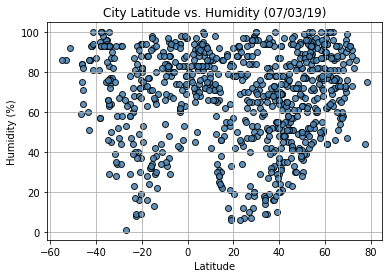

In [16]:
# Get Max Humidity
humidity_max = cities_data_df["Humidity"].max()

# Get max date with Max Humidity
date_utc = cities_data_df["Date"].loc[cities_data_df["Humidity"] == humidity_max].max()

# Convert max date with Max Temperature from Unix,UTC to readable format
date = datetime.fromtimestamp(date_utc).strftime("%m/%d/%y")

# Build a scatter plot for each data type
plt.scatter(cities_data_df["Lat"], cities_data_df["Humidity"], marker="o", facecolor = "steelblue", edgecolor="black", alpha=0.85)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/HumidityVsLatitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

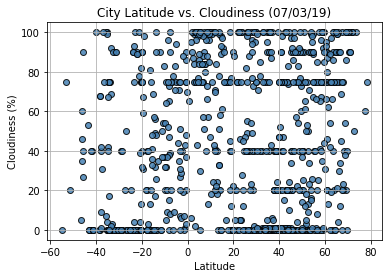

In [17]:
# Get Max Cloudiness
cloud_max = cities_data_df["Cloudiness"].max()

# Get max date with Max Cloudiness
date_utc = cities_data_df["Date"].loc[cities_data_df["Cloudiness"] == cloud_max].max()

# Convert max date with Max Cloudiness from Unix,UTC to readable format
date = datetime.fromtimestamp(date_utc).strftime("%m/%d/%y")

# Build a scatter plot for each data type
plt.scatter(cities_data_df["Lat"], cities_data_df["Cloudiness"], marker="o", facecolor = "steelblue", edgecolor="black", alpha=0.85)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/CloudinessVsLatitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

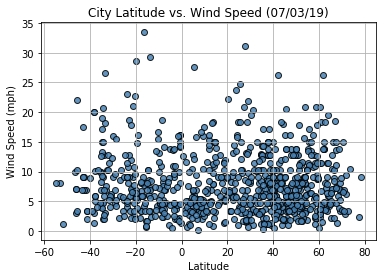

In [18]:
# Get Max Wind Speed
wind_max = cities_data_df["Wind Speed"].max()

# Get max date with Max Wind Speed
date_utc = cities_data_df["Date"].loc[cities_data_df["Wind Speed"] == wind_max].max()

# Convert max date with Max Wind Speed from Unix,UTC to readable format
date = datetime.fromtimestamp(date_utc).strftime("%m/%d/%y")

# Build a scatter plot for each data type
plt.scatter(cities_data_df["Lat"], cities_data_df["Wind Speed"], marker="o", facecolor = "steelblue", edgecolor="black", alpha=0.85)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/WindSpeedVsLatitude.png")

# Show plot
plt.show()

In [31]:
print("Max wind: " + str(cities_data_df["Wind Speed"].max()))

Max wind: 33.44


### Conclusions Based on WeatherPy Analysis

* First of all, we must mention the limitations of this analysis. We do not estimate whether the temperature was measured during the day or at night? We consider the temperature only on the surface of the earth and do not evaluate the characteristics of the measurement site, for example, is it a mountain or not? However, the characteristics of the measurement site can extremely affect the result. We do not estimate time-dependent temperature changes, we compare only the maximum values.

* Our temperature estimate starts at $-60$ and ends at $80$ latitudes. The temperature increases from $30.2$F at a latitude of about $-60$ to $116.4$F at a latitude of about $30$, and then decreases to $33.02$F at a latitude of about $70$. It should be noted that the maximum temperature is not located at the equator. The maximum of temperature was fixed on 07/03/19 at the North Africa.

* The maximum humidity was $100%$ and was observed from $-40$ to $70$ latitude. It should be noted that the minimum values of humidity were observed only in the range from $-30$ to $40$ latitude.

* Cloudiness was almost evenly distributed from $-60$ to $80$ latitude.

* The maximum wind speed in our estimate was $33.44(mph)$ and was observed at a latitude of about $-20$. In general, wind speed did not exceed $15(mph)$ in most cities. Wind speeds above $25(mph)$ were observed in only 8 of 811 cities in the latitude range from about $-35$ to about $62$.